In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
X_train = pd.read_csv("X_train.csv", header=None)
X_test = pd.read_csv("X_test.csv", header=None)
y_train = pd.read_csv("y_train.csv", header=None)
y_test = pd.read_csv("y_test.csv", header=None)

In [3]:
#part 1.a
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)

df_lambda = []
coeff = [[],[],[],[],[],[],[]]
for lam in range(5001):
    s_ii = S / (lam + S**2)
    diag = np.diag(s_ii)
    wrr = np.dot(np.dot(np.dot(Vt.T, diag), U.T), y_train)
    for i in range(7):
        coeff[i].append(wrr[i]) 
    
    df_lam = 0
    for i in S:
        d = i**2/(lam + i**2)
        df_lam += d
    df_lambda.append(df_lam)
    

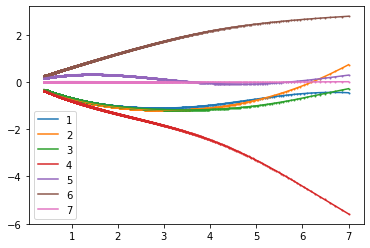

In [4]:
plt.scatter(df_lambda, coeff[0], s=1)
plt.plot(df_lambda, coeff[0], label='1')

plt.scatter(df_lambda, coeff[1], s=1)
plt.plot(df_lambda, coeff[1], label='2')

plt.scatter(df_lambda, coeff[2], s=1)
plt.plot(df_lambda, coeff[2], label='3')

plt.scatter(df_lambda, coeff[3], s=1)
plt.plot(df_lambda, coeff[3], label='4')

plt.scatter(df_lambda, coeff[4], s=1)
plt.plot(df_lambda, coeff[4], label='5')

plt.scatter(df_lambda, coeff[5], s=1)
plt.plot(df_lambda, coeff[5], label='6')

plt.scatter(df_lambda, coeff[6], s=1)
plt.plot(df_lambda, coeff[6], label='7')

plt.legend()

In [5]:
#part 1.b
rmse_list = []
lambdas = []
for lam in range(51):
    lambdas.append(lam)
    s_ii = S / (lam + S**2)
    diag = np.diag(s_ii)
    wrr = np.dot(np.dot(np.dot(Vt.T, diag), U.T), y_train)
    y_hat = np.dot(X_test, wrr)
    rmse = np.sqrt(((y_hat - y_test) ** 2).mean())
    rmse_list.append(rmse)

Text(0, 0.5, 'rmse')

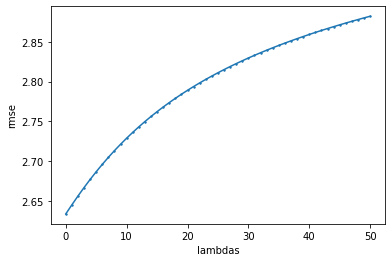

In [6]:
plt.scatter(lambdas, rmse_list, s=2)
plt.plot(lambdas, rmse_list)
plt.xlabel('lambdas')
plt.ylabel('rmse')

In [7]:
# part 2

#p1
rmse_list_p1 = []
lambdas_p1 = []
for lam in range(101):
    lambdas_p1.append(lam)
    s_ii = S / (lam + S**2)
    diag = np.diag(s_ii)
    wrr = np.dot(np.dot(np.dot(Vt.T, diag), U.T), y_train)
    y_hat = np.dot(X_test, wrr)
    rmse = np.sqrt(((y_hat - y_test) ** 2).mean())
    rmse_list_p1.append(rmse)

### data transformation

In [8]:
scaler = StandardScaler()
scaler.fit(y_train)
y_train_standard = scaler.transform(y_train)
y_test_standard = scaler.transform(y_test)

In [9]:
#p2
X_train_p2 = X_train.copy(deep=True)
X_train_p2['0_p2'] = X_train[0]**2
X_train_p2['1_p2'] = X_train[1]**2
X_train_p2['2_p2'] = X_train[2]**2
X_train_p2['3_p2'] = X_train[3]**2
X_train_p2['4_p2'] = X_train[4]**2
X_train_p2['5_p2'] = X_train[5]**2

In [10]:
X_test_p2 = X_test.copy(deep=True)
X_test_p2['0_p2'] = X_test[0]**2
X_test_p2['1_p2'] = X_test[1]**2
X_test_p2['2_p2'] = X_test[2]**2
X_test_p2['3_p2'] = X_test[3]**2
X_test_p2['4_p2'] = X_test[4]**2
X_test_p2['5_p2'] = X_test[5]**2

In [11]:
scaler = StandardScaler()
scaler.fit(X_train_p2)

X_train_p2_standard = scaler.transform(X_train_p2)
X_test_p2_standard = scaler.transform(X_test_p2)

X_train_p2_standard = pd.DataFrame(X_train_p2_standard)
X_test_p2_standard = pd.DataFrame(X_test_p2_standard)


In [12]:
X_train_p2_standard[0] = X_train[0]
X_train_p2_standard[1] = X_train[1]
X_train_p2_standard[2] = X_train[2]
X_train_p2_standard[3] = X_train[3]
X_train_p2_standard[4] = X_train[4]
X_train_p2_standard[5] = X_train[5]
X_train_p2_standard[6] = 1

In [13]:
X_test_p2_standard[0] = X_test[0]
X_test_p2_standard[1] = X_test[1]
X_test_p2_standard[2] = X_test[2]
X_test_p2_standard[3] = X_test[3]
X_test_p2_standard[4] = X_test[4]
X_test_p2_standard[5] = X_test[5]
X_test_p2_standard[6] = 1

In [14]:
# X_train_p2_standard = pd.DataFrame(StandardScaler().fit_transform(X_train_p2))
# X_train_p2_standard[6] = 1
# X_test_p2_standard = pd.DataFrame(StandardScaler().fit_transform(X_test_p2))
# X_test_p2_standard[6] = 1

In [15]:
# y_train_standard = pd.DataFrame(StandardScaler().fit_transform(y_train))
# y_test_standard = pd.DataFrame(StandardScaler().fit_transform(y_test))

In [16]:
#p3
X_train_p3 = X_train_p2_standard.copy(deep=True)
X_train_p3['0_p3'] = X_train[0]**3
X_train_p3['1_p3'] = X_train[1]**3
X_train_p3['2_p3'] = X_train[2]**3
X_train_p3['3_p3'] = X_train[3]**3
X_train_p3['4_p3'] = X_train[4]**3
X_train_p3['5_p3'] = X_train[5]**3

X_test_p3 = X_test_p2_standard.copy(deep=True)
X_test_p3['0_p3'] = X_test[0]**3
X_test_p3['1_p3'] = X_test[1]**3
X_test_p3['2_p3'] = X_test[2]**3
X_test_p3['3_p3'] = X_test[3]**3
X_test_p3['4_p3'] = X_test[4]**3
X_test_p3['5_p3'] = X_test[5]**3

In [17]:
# X_train_p3_standard = pd.DataFrame(StandardScaler().fit_transform(X_train_p3))
# X_train_p3_standard[6] = 1
# X_test_p3_standard = pd.DataFrame(StandardScaler().fit_transform(X_test_p3))
# X_test_p3_standard[6] = 1
scaler = StandardScaler()
scaler.fit(X_train_p3)
X_train_p3_standard = scaler.transform(X_train_p3)
X_test_p3_standard = scaler.transform(X_test_p3)

X_train_p3_standard = pd.DataFrame(X_train_p3_standard)
X_train_p3_standard[6] = 1

X_test_p3_standard = pd.DataFrame(X_test_p3_standard)
X_test_p3_standard[6] = 1

In [18]:
X_train_p3_standard[0] = X_train[0]
X_train_p3_standard[1] = X_train[1]
X_train_p3_standard[2] = X_train[2]
X_train_p3_standard[3] = X_train[3]
X_train_p3_standard[4] = X_train[4]
X_train_p3_standard[5] = X_train[5]

In [19]:
X_test_p3_standard[0] = X_test[0]
X_test_p3_standard[1] = X_test[1]
X_test_p3_standard[2] = X_test[2]
X_test_p3_standard[3] = X_test[3]
X_test_p3_standard[4] = X_test[4]
X_test_p3_standard[5] = X_test[5]

In [20]:
def calc_rmse(X_train, y_train, X_test, y_test):
    U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
    rmse_list = []
    for lam in range(101):
        s_ii = S / (lam + S**2)
        diag = np.diag(s_ii)
        wrr = np.dot(np.dot(np.dot(Vt.T, diag), U.T), y_train)
        y_hat = np.dot(X_test, wrr)
        rmse = np.sqrt(((y_hat - y_test) ** 2).mean())
        rmse_list.append(rmse)
    return rmse_list

In [26]:
p2_rmse = calc_rmse(X_train_p2_standard, y_train_standard, X_test_p2_standard, y_test_standard)
p3_rmse = calc_rmse(X_train_p3_standard, y_train_standard, X_test_p3_standard, y_test_standard)

In [22]:
# U, S, Vt = np.linalg.svd(X_train_p2_standard, full_matrices=False)
# rmse_list_p2 = []
# lambdas_p2 = []
# for lam in range(101):
#     lambdas_p2.append(lam)
#     s_ii = S / (lam + S**2)
#     diag = np.diag(s_ii)
#     wrr = np.dot(np.dot(np.dot(Vt.T, diag), U.T), y_train_standard)
#     y_hat = np.dot(X_test_p2_standard, wrr)
#     rmse = np.sqrt(((y_hat - y_test_standard) ** 2).mean())
#     rmse_list_p2.append(rmse)

In [23]:
# U, S, Vt = np.linalg.svd(X_train_p3_standard, full_matrices=False)
# rmse_list_p3 = []
# lambdas_p3 = []
# for lam in range(101):
#     lambdas_p3.append(lam)
#     s_ii = S / (lam + S**2)
#     diag = np.diag(s_ii)
#     wrr = np.dot(np.dot(np.dot(Vt.T, diag), U.T), y_train_standard)
#     y_hat = np.dot(X_test_p3_standard, wrr)
#     rmse = np.sqrt(((y_hat - y_test_standard) ** 2).mean())
#     rmse_list_p3.append(rmse)

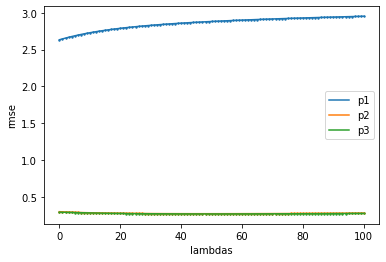

In [27]:
plt.scatter(lambdas_p1, rmse_list_p1, s=2)
plt.plot(lambdas_p1, rmse_list_p1, label='p1')

plt.scatter(lambdas_p1, p2_rmse, s=2)
plt.plot(lambdas_p1, p2_rmse, label='p2')

plt.scatter(lambdas_p1, p3_rmse, s=2)
plt.plot(lambdas_p1, p3_rmse, label='p3')

plt.xlabel('lambdas')
plt.ylabel('rmse')

plt.legend()